In [1]:
import pandas as pd

# Load the CSV file
data = pd.read_csv('I80dataset2.csv')

# Define the range of lane numbers for which we want to capture lane changes
lane_numbers = [2, 3, 4, 5, 6, 7]

# Iterate through each pair of consecutive lanes
for i in range(len(lane_numbers) - 1):
    lane_from = lane_numbers[i]
    lane_to = lane_numbers[i + 1]

    # Separate data for the current pair of lanes
    lane_data_from = data[data['lane_no'] == lane_from]
    lane_data_to = data[data['lane_no'] == lane_to]

    # Create empty lists to store lane-changing vehicle data for each type
    lane_change_from_to = []
    lane_change_to_from = []

    # Find common vehicle IDs between the two lanes
    common_vehicle_ids = set(lane_data_from.iloc[:, 0]) & set(lane_data_to.iloc[:, 0])

    # Iterate through common vehicle IDs
    for vehicle_id in common_vehicle_ids:
        data_lane_from = lane_data_from[lane_data_from.iloc[:, 0] == vehicle_id]
        data_lane_to = lane_data_to[lane_data_to.iloc[:, 0] == vehicle_id]

        # Check if the second column value in the 'from' lane is less than that in the 'to' lane
        if data_lane_from.iloc[0, 1] < data_lane_to.iloc[0, 1]:
            # Lane change from 'from' to 'to'
            data_lane_from['from_lane'] = lane_from
            data_lane_to['from_lane'] = lane_to
            lane_change_from_to.append(pd.concat([data_lane_from, data_lane_to]))
        else:
            # Lane change from 'to' to 'from'
            data_lane_from['from_lane'] = lane_to
            data_lane_to['from_lane'] = lane_from
            lane_change_to_from.append(pd.concat([data_lane_from, data_lane_to]))

    # Combine all the lane-changing vehicles' data for the current lane pair
    lane_change_from_to_df = pd.concat(lane_change_from_to) if lane_change_from_to else pd.DataFrame()
    lane_change_to_from_df = pd.concat(lane_change_to_from) if lane_change_to_from else pd.DataFrame()

    # Save the results to separate CSV files for the current lane pair
    if not lane_change_from_to_df.empty:
        lane_change_from_to_df.to_csv(f'lane_changing_{lane_from}_to_{lane_to}.csv', index=False)
    if not lane_change_to_from_df.empty:
        lane_change_to_from_df.to_csv(f'lane_changing_{lane_to}_to_{lane_from}.csv', index=False)

    # Optional: print the results
    print(f"Lane change from {lane_from} to {lane_to}:")
    print(lane_change_from_to_df)
    print(f"\nLane change from {lane_to} to {lane_from}:")
    print(lane_change_to_from_df)


C:\Users\dell\AppData\Local\Temp\ipykernel_24996\3192527918.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_lane_from['from_lane'] = lane_from
C:\Users\dell\AppData\Local\Temp\ipykernel_24996\3192527918.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_lane_to['from_lane'] = lane_to
C:\Users\dell\AppData\Local\Temp\ipykernel_24996\3192527918.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

C:\Users\dell\AppData\Local\Temp\ipykernel_24996\3192527918.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_lane_from['from_lane'] = lane_to
C:\Users\dell\AppData\Local\Temp\ipykernel_24996\3192527918.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_lane_to['from_lane'] = lane_from
C:\Users\dell\AppData\Local\Temp\ipykernel_24996\3192527918.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

Lane change from 2 to 3:
             0       1      2          3       4         5            6  \
240561  1281.0  3332.0  902.0  17.083361  20.371    65.015  6042843.469   
240562  1281.0  3333.0  902.0  17.083389  20.375    67.565  6042843.161   
240563  1281.0  3334.0  902.0  17.083417  20.376    69.065  6042842.977   
240564  1281.0  3335.0  902.0  17.083444  20.375    71.565  6042842.669   
240565  1281.0  3336.0  902.0  17.083472  20.374    74.065  6042842.361   
...        ...     ...    ...        ...     ...       ...          ...   
435191   504.0  1236.0  718.0  17.025139  29.344  1653.613  6042628.863   
435192   504.0  1237.0  718.0  17.025167  29.358  1655.136  6042628.634   
435193   504.0  1238.0  718.0  17.025194  29.372  1656.658  6042628.405   
435194   504.0  1239.0  718.0  17.025222  29.386  1658.182  6042628.175   
435195   504.0  1240.0  718.0  17.025250  29.400  1659.704  6042627.946   

                  7     8    9  ...     15     16    17           18  \
24

C:\Users\dell\AppData\Local\Temp\ipykernel_24996\3192527918.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_lane_from['from_lane'] = lane_to
C:\Users\dell\AppData\Local\Temp\ipykernel_24996\3192527918.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_lane_to['from_lane'] = lane_from
C:\Users\dell\AppData\Local\Temp\ipykernel_24996\3192527918.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

C:\Users\dell\AppData\Local\Temp\ipykernel_24996\3192527918.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_lane_from['from_lane'] = lane_to
C:\Users\dell\AppData\Local\Temp\ipykernel_24996\3192527918.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_lane_to['from_lane'] = lane_from
C:\Users\dell\AppData\Local\Temp\ipykernel_24996\3192527918.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

C:\Users\dell\AppData\Local\Temp\ipykernel_24996\3192527918.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_lane_from['from_lane'] = lane_to
C:\Users\dell\AppData\Local\Temp\ipykernel_24996\3192527918.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_lane_to['from_lane'] = lane_from
C:\Users\dell\AppData\Local\Temp\ipykernel_24996\3192527918.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

Lane change from 3 to 4:
             0       1      2          3       4         5            6  \
541963  1541.0  5087.0  680.0  17.132111  24.413  1137.911  6042706.786   
541964  1541.0  5088.0  680.0  17.132139  24.707  1140.338  6042706.696   
541965  1541.0  5089.0  680.0  17.132167  25.000  1142.772  6042706.605   
541966  1541.0  5090.0  680.0  17.132194  25.301  1145.208  6042706.520   
541967  1541.0  5091.0  680.0  17.132222  25.595  1147.622  6042706.430   
...        ...     ...    ...        ...     ...       ...          ...   
777756  1412.0  4806.0  891.0  17.124306  41.870  1629.736  6042645.030   
777757  1412.0  4807.0  891.0  17.124333  42.009  1632.598  6042644.711   
777758  1412.0  4808.0  891.0  17.124361  42.059  1635.261  6042644.345   
777759  1412.0  4809.0  891.0  17.124389  42.079  1638.262  6042643.889   
777760  1412.0  4810.0  891.0  17.124417  42.096  1640.762  6042643.510   

                  7     8    9  ...      15     16    17           18  \
5

C:\Users\dell\AppData\Local\Temp\ipykernel_24996\3192527918.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_lane_from['from_lane'] = lane_to
C:\Users\dell\AppData\Local\Temp\ipykernel_24996\3192527918.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_lane_to['from_lane'] = lane_from
C:\Users\dell\AppData\Local\Temp\ipykernel_24996\3192527918.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

C:\Users\dell\AppData\Local\Temp\ipykernel_24996\3192527918.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_lane_to['from_lane'] = lane_from
C:\Users\dell\AppData\Local\Temp\ipykernel_24996\3192527918.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_lane_from['from_lane'] = lane_to
C:\Users\dell\AppData\Local\Temp\ipykernel_24996\3192527918.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

C:\Users\dell\AppData\Local\Temp\ipykernel_24996\3192527918.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_lane_from['from_lane'] = lane_to
C:\Users\dell\AppData\Local\Temp\ipykernel_24996\3192527918.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_lane_to['from_lane'] = lane_from
C:\Users\dell\AppData\Local\Temp\ipykernel_24996\3192527918.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

Lane change from 4 to 5:
              0       1       2          3       4         5            6  \
796047   1539.0  4389.0   848.0  17.112722  46.118    63.458  6042869.208   
796048   1539.0  4390.0   848.0  17.112750  46.124    66.458  6042868.838   
796049   1539.0  4391.0   848.0  17.112778  46.125    69.571  6042868.469   
796050   1539.0  4392.0   848.0  17.112806  46.125    72.071  6042868.161   
796051   1539.0  4393.0   848.0  17.112833  46.124    75.071  6042867.792   
...         ...     ...     ...        ...     ...       ...          ...   
1183560  2481.0  8289.0  1718.0  17.221056  57.852  1126.482  6042741.603   
1183561  2481.0  8290.0  1718.0  17.221083  58.089  1128.950  6042741.448   
1183562  2481.0  8291.0  1718.0  17.221111  58.401  1131.452  6042741.365   
1183563  2481.0  8292.0  1718.0  17.221139  58.830  1133.974  6042741.396   
1183564  2481.0  8293.0  1718.0  17.221167  59.246  1136.560  6042741.401   

                   7     8    9  ...      15     1

C:\Users\dell\AppData\Local\Temp\ipykernel_24996\3192527918.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_lane_from['from_lane'] = lane_to
C:\Users\dell\AppData\Local\Temp\ipykernel_24996\3192527918.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_lane_to['from_lane'] = lane_from
C:\Users\dell\AppData\Local\Temp\ipykernel_24996\3192527918.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

C:\Users\dell\AppData\Local\Temp\ipykernel_24996\3192527918.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_lane_from['from_lane'] = lane_to
C:\Users\dell\AppData\Local\Temp\ipykernel_24996\3192527918.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_lane_to['from_lane'] = lane_from
C:\Users\dell\AppData\Local\Temp\ipykernel_24996\3192527918.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

C:\Users\dell\AppData\Local\Temp\ipykernel_24996\3192527918.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_lane_to['from_lane'] = lane_from
C:\Users\dell\AppData\Local\Temp\ipykernel_24996\3192527918.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_lane_from['from_lane'] = lane_to
C:\Users\dell\AppData\Local\Temp\ipykernel_24996\3192527918.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

C:\Users\dell\AppData\Local\Temp\ipykernel_24996\3192527918.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_lane_to['from_lane'] = lane_from
C:\Users\dell\AppData\Local\Temp\ipykernel_24996\3192527918.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_lane_from['from_lane'] = lane_to
C:\Users\dell\AppData\Local\Temp\ipykernel_24996\3192527918.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

Lane change from 5 to 6:
              0       1      2          3       4         5            6  \
1076955  1539.0  4432.0  848.0  17.113917  47.922   138.450  6042861.749   
1076956  1539.0  4433.0  848.0  17.113944  47.984   139.852  6042861.637   
1076957  1539.0  4434.0  848.0  17.113972  48.046   141.254  6042861.525   
1076958  1539.0  4435.0  848.0  17.114000  48.108   142.655  6042861.413   
1076959  1539.0  4436.0  848.0  17.114028  48.170   144.054  6042861.301   
...         ...     ...    ...        ...     ...       ...          ...   
1353104  1520.0  5173.0  842.0  17.134500  68.593  1628.690  6042671.578   
1353105  1520.0  5174.0  842.0  17.134528  68.712  1631.646  6042671.238   
1353106  1520.0  5175.0  842.0  17.134556  68.784  1634.588  6042670.839   
1353107  1520.0  5176.0  842.0  17.134583  68.805  1637.587  6042670.384   
1353108  1520.0  5177.0  842.0  17.134611  68.825  1640.587  6042669.928   

                   7     8    9  ...      15     16    17     

C:\Users\dell\AppData\Local\Temp\ipykernel_24996\3192527918.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_lane_from['from_lane'] = lane_to
C:\Users\dell\AppData\Local\Temp\ipykernel_24996\3192527918.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_lane_to['from_lane'] = lane_from
C:\Users\dell\AppData\Local\Temp\ipykernel_24996\3192527918.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

C:\Users\dell\AppData\Local\Temp\ipykernel_24996\3192527918.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_lane_from['from_lane'] = lane_to
C:\Users\dell\AppData\Local\Temp\ipykernel_24996\3192527918.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_lane_to['from_lane'] = lane_from
C:\Users\dell\AppData\Local\Temp\ipykernel_24996\3192527918.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

C:\Users\dell\AppData\Local\Temp\ipykernel_24996\3192527918.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_lane_from['from_lane'] = lane_to
C:\Users\dell\AppData\Local\Temp\ipykernel_24996\3192527918.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_lane_to['from_lane'] = lane_from
C:\Users\dell\AppData\Local\Temp\ipykernel_24996\3192527918.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

C:\Users\dell\AppData\Local\Temp\ipykernel_24996\3192527918.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_lane_to['from_lane'] = lane_to
C:\Users\dell\AppData\Local\Temp\ipykernel_24996\3192527918.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_lane_from['from_lane'] = lane_to
C:\Users\dell\AppData\Local\Temp\ipykernel_24996\3192527918.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

C:\Users\dell\AppData\Local\Temp\ipykernel_24996\3192527918.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_lane_from['from_lane'] = lane_to
C:\Users\dell\AppData\Local\Temp\ipykernel_24996\3192527918.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_lane_to['from_lane'] = lane_from
C:\Users\dell\AppData\Local\Temp\ipykernel_24996\3192527918.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

Lane change from 6 to 7:
              0       1       2          3       4        5            6  \
1464674  2566.0  7405.0  1382.0  17.196500  66.903   55.586  6042890.816   
1464675  2566.0  7406.0  1382.0  17.196528  66.906   56.511  6042890.703   
1464676  2566.0  7407.0  1382.0  17.196556  66.908   57.436  6042890.589   
1464677  2566.0  7408.0  1382.0  17.196583  66.911   58.361  6042890.476   
1464678  2566.0  7409.0  1382.0  17.196611  66.913   59.286  6042890.362   
...         ...     ...     ...        ...     ...      ...          ...   
1514307  1535.0  4718.0   874.0  17.121861  79.221  659.567  6042828.670   
1514308  1535.0  4719.0   874.0  17.121889  79.087  661.096  6042828.347   
1514309  1535.0  4720.0   874.0  17.121917  78.824  662.576  6042827.903   
1514310  1535.0  4721.0   874.0  17.121944  78.537  664.020  6042827.427   
1514311  1535.0  4722.0   874.0  17.121972  78.219  665.399  6042826.932   

                   7     8    9  ...      15     16    17     

## UNmatched lane rows in while merging follower data into lane change vehicle data

In [39]:
import pandas as pd

# Load the datasets
whole_data = pd.read_csv('I80dataset1 1.csv')  # Whole CSV file containing all vehicles
lane_changing_data = pd.read_csv('lane_changing_2_to_3.csv')  # Lane-changing vehicle file

# Filter only lane 3 data from the whole dataset (target lane)
lane_3_data = whole_data[whole_data['lane_no'] == 3]

# Initialize a list to store the final output
merged_data = []

# Initialize a list to track unmatched vehicles
unmatched_vehicles = []

# Iterate through each lane-changing vehicle entry
for index, lane_change_vehicle in lane_changing_data.iterrows():
    # Extract frame number and Y value for the lane-changing vehicle
    lane_change_frame = lane_change_vehicle['1']  # Frame number
    lane_change_y = lane_change_vehicle['5']      # Y value of the lane-changing vehicle
    
    # Filter lane 3 data for the same frame
    frame_data = lane_3_data[lane_3_data['1'] == lane_change_frame]
    
    # Filter to get only those vehicles whose Y value is less than the lane-changing vehicle
    followers = frame_data[frame_data['5'] < lane_change_y]
    
    # Check if there are followers in the target lane
    if not followers.empty:
        # Find the closest follower vehicle (the one with the highest Y value but less than lane_change_y)
        closest_follower = followers.loc[followers['5'].idxmax()]
        
        # Reset the index for lane-changing and follower vehicle data to avoid index collision
        lane_change_vehicle = lane_change_vehicle.reset_index(drop=True)
        closest_follower = closest_follower.reset_index(drop=True)
        
        # Combine lane-changing vehicle data with the closest follower's data, keeping columns separate
        combined_data = pd.concat([lane_change_vehicle.add_suffix('_lane_change'), closest_follower.add_suffix('_follower')], axis=0)
        
        # Append to the merged data list
        merged_data.append(combined_data)
    else:
        # Log unmatched vehicles
        unmatched_vehicles.append(lane_change_vehicle)

# Convert the final merged list into a DataFrame
final_df = pd.DataFrame(merged_data)

# Convert the unmatched vehicles into a DataFrame to inspect
unmatched_df = pd.DataFrame(unmatched_vehicles)

# Save the result to a new CSV file
#final_df.to_csv('lane_change_with_followers.csv', index=False)

# Save the unmatched vehicles to a CSV file to inspect the cases where no followers were found
unmatched_df.to_csv('unmatched_lane_change.csv', index=False)

print(f"Processing complete. Output saved to 'lane_change_with_followers.csv'.")
print(f"Unmatched lane-changing vehicles saved to 'unmatched_lane_change.csv'.")


Processing complete. Output saved to 'lane_change_with_followers.csv'.
Unmatched lane-changing vehicles saved to 'unmatched_lane_change.csv'.


## Automated code for all the lanes for adding follower data

In [3]:
import pandas as pd

# Load the whole dataset file (this remains constant)
whole_data = pd.read_csv('I80dataset2.csv')  # Whole CSV file containing all vehicles

# List of lane-changing CSV files
lane_changing_files = [
    'lane_changing_2_to_3.csv',
    'lane_changing_3_to_2.csv',
    'lane_changing_3_to_4.csv',
    'lane_changing_4_to_3.csv',
    'lane_changing_4_to_5.csv',
    'lane_changing_5_to_4.csv',
    'lane_changing_5_to_6.csv',
    'lane_changing_6_to_5.csv',
    'lane_changing_6_to_7.csv',
    'lane_changing_7_to_6.csv'
]

# Function to process each lane-changing file and merge with follower information
def process_lane_changing_file(file_name, whole_data):
    # Extract source and target lanes from the file name
    try:
        # Strip out 'lane_changing_' and '.csv' from the file name
        lanes_part = file_name.replace('lane_changing_', '').replace('.csv', '')
        
        # Split the lane part into source and target lanes
        lanes = lanes_part.split('_to_')
        if len(lanes) != 2:
            raise ValueError(f"Unexpected file name format: {file_name}")
        
        source_lane = int(lanes[0])  # Source lane (where the vehicle comes from)
        target_lane = int(lanes[1])  # Target lane (where the vehicle is changing to)
    except (IndexError, ValueError) as e:
        print(f"Error processing file {file_name}: {e}")
        return
    
    # Load the lane-changing data
    lane_changing_data = pd.read_csv(file_name)
    
    # Filter the whole dataset for the target lane
    target_lane_data = whole_data[whole_data['lane_no'] == target_lane]
    
    # Initialize a list to store the merged output for this file
    merged_data = []

    # Iterate through each lane-changing vehicle entry
    for _, lane_change_vehicle in lane_changing_data.iterrows():
        # Extract frame number and Y value for the lane-changing vehicle
        lane_change_frame = lane_change_vehicle['1']  # Frame number
        lane_change_y = lane_change_vehicle['5']      # Y value of the lane-changing vehicle
        
        # Filter the target lane data for the same frame
        frame_data = target_lane_data[target_lane_data['1'] == lane_change_frame]
        
        # Filter to get only those vehicles whose Y value is less than the lane-changing vehicle
        followers = frame_data[frame_data['5'] < lane_change_y]
        
        # Check if there are followers in the target lane
        if not followers.empty:
            # Find the closest follower vehicle (the one with the highest Y value but less than lane_change_y)
            closest_follower = followers.loc[followers['5'].idxmax()]
            
            # Convert both lane-changing and follower data to DataFrames and ensure same index
            lane_change_df = pd.DataFrame([lane_change_vehicle]).reset_index(drop=True)
            follower_df = pd.DataFrame([closest_follower]).reset_index(drop=True)
            
            # Concatenate the dataframes side by side (horizontally) using axis=1
            combined_data = pd.concat([lane_change_df.add_suffix('_lane_change'), follower_df.add_suffix('_follower')], axis=1)
            
            # Append to the merged data list
            merged_data.append(combined_data)

    # Convert the merged data list into a DataFrame
    if merged_data:  # Only if there is data to merge
        final_df = pd.concat(merged_data, ignore_index=True)
    
        # Save the result to a new CSV file (output name based on input file)
        output_file = f"merged_{file_name}"
        final_df.to_csv(output_file, index=False)
    
        print(f"Processing complete for {file_name}. Output saved to '{output_file}'.")
    else:
        print(f"No followers found for {file_name}.")

# Loop through each lane-changing file and process it
for file in lane_changing_files:
    process_lane_changing_file(file, whole_data)


Processing complete for lane_changing_2_to_3.csv. Output saved to 'merged_lane_changing_2_to_3.csv'.
Processing complete for lane_changing_3_to_2.csv. Output saved to 'merged_lane_changing_3_to_2.csv'.
Processing complete for lane_changing_3_to_4.csv. Output saved to 'merged_lane_changing_3_to_4.csv'.
Processing complete for lane_changing_4_to_3.csv. Output saved to 'merged_lane_changing_4_to_3.csv'.
Processing complete for lane_changing_4_to_5.csv. Output saved to 'merged_lane_changing_4_to_5.csv'.
Processing complete for lane_changing_5_to_4.csv. Output saved to 'merged_lane_changing_5_to_4.csv'.
Processing complete for lane_changing_5_to_6.csv. Output saved to 'merged_lane_changing_5_to_6.csv'.
Processing complete for lane_changing_6_to_5.csv. Output saved to 'merged_lane_changing_6_to_5.csv'.
Processing complete for lane_changing_6_to_7.csv. Output saved to 'merged_lane_changing_6_to_7.csv'.
Processing complete for lane_changing_7_to_6.csv. Output saved to 'merged_lane_changing_7_t

# SORTED MERGED FILES

In [5]:
import pandas as pd
import os

# List of file names (without extensions)
file_names = [
    'merged_lane_changing_2_to_3',
    'merged_lane_changing_3_to_2',
    'merged_lane_changing_3_to_4',
    'merged_lane_changing_4_to_3',
    'merged_lane_changing_4_to_5',
    'merged_lane_changing_5_to_4',
    'merged_lane_changing_5_to_6',
    'merged_lane_changing_6_to_5',
    'merged_lane_changing_6_to_7',
    'merged_lane_changing_7_to_6'
]

# Base path where the files are stored
base_path = r'C:\Users\dell\OneDrive - iitr.ac.in\NGSIM data\Data_set_2'

# Function that sorts each vehicle's data by the frame number (column '1_lane_change')
def sort_by_frame(group):
    return group.sort_values(by='1_lane_change')

# Loop over each file in the list
for file_name in file_names:
    # Create the full file path for the input file
    input_file_path = os.path.join(base_path, f'{file_name}.csv')
    
    # Read the CSV file
    data = pd.read_csv(input_file_path)
    
    # Apply the sorting function to each group of vehicle IDs and retain the original order
    sorted_data = data.groupby('0_lane_change', sort=False).apply(sort_by_frame).reset_index(drop=True)
    
    # Define the output file name (with 'sorted_' prefix)
    output_file_name = f'sorted_{file_name}.csv'
    
    # Create the full file path for the output file
    output_file_path = os.path.join(base_path, output_file_name)
    
    # Save the sorted data to a new CSV file
    sorted_data.to_csv(output_file_path, index=False)
    
    print(f"Data for {file_name} has been sorted and saved to: {output_file_path}")



C:\Users\dell\AppData\Local\Temp\ipykernel_24996\2331948062.py:34: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sorted_data = data.groupby('0_lane_change', sort=False).apply(sort_by_frame).reset_index(drop=True)


Data for merged_lane_changing_2_to_3 has been sorted and saved to: C:\Users\dell\OneDrive - iitr.ac.in\NGSIM data\Data_set_2\sorted_merged_lane_changing_2_to_3.csv


C:\Users\dell\AppData\Local\Temp\ipykernel_24996\2331948062.py:34: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sorted_data = data.groupby('0_lane_change', sort=False).apply(sort_by_frame).reset_index(drop=True)


Data for merged_lane_changing_3_to_2 has been sorted and saved to: C:\Users\dell\OneDrive - iitr.ac.in\NGSIM data\Data_set_2\sorted_merged_lane_changing_3_to_2.csv


C:\Users\dell\AppData\Local\Temp\ipykernel_24996\2331948062.py:34: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sorted_data = data.groupby('0_lane_change', sort=False).apply(sort_by_frame).reset_index(drop=True)


Data for merged_lane_changing_3_to_4 has been sorted and saved to: C:\Users\dell\OneDrive - iitr.ac.in\NGSIM data\Data_set_2\sorted_merged_lane_changing_3_to_4.csv


C:\Users\dell\AppData\Local\Temp\ipykernel_24996\2331948062.py:34: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sorted_data = data.groupby('0_lane_change', sort=False).apply(sort_by_frame).reset_index(drop=True)


Data for merged_lane_changing_4_to_3 has been sorted and saved to: C:\Users\dell\OneDrive - iitr.ac.in\NGSIM data\Data_set_2\sorted_merged_lane_changing_4_to_3.csv


C:\Users\dell\AppData\Local\Temp\ipykernel_24996\2331948062.py:34: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sorted_data = data.groupby('0_lane_change', sort=False).apply(sort_by_frame).reset_index(drop=True)


Data for merged_lane_changing_4_to_5 has been sorted and saved to: C:\Users\dell\OneDrive - iitr.ac.in\NGSIM data\Data_set_2\sorted_merged_lane_changing_4_to_5.csv


C:\Users\dell\AppData\Local\Temp\ipykernel_24996\2331948062.py:34: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sorted_data = data.groupby('0_lane_change', sort=False).apply(sort_by_frame).reset_index(drop=True)


Data for merged_lane_changing_5_to_4 has been sorted and saved to: C:\Users\dell\OneDrive - iitr.ac.in\NGSIM data\Data_set_2\sorted_merged_lane_changing_5_to_4.csv


C:\Users\dell\AppData\Local\Temp\ipykernel_24996\2331948062.py:34: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sorted_data = data.groupby('0_lane_change', sort=False).apply(sort_by_frame).reset_index(drop=True)


Data for merged_lane_changing_5_to_6 has been sorted and saved to: C:\Users\dell\OneDrive - iitr.ac.in\NGSIM data\Data_set_2\sorted_merged_lane_changing_5_to_6.csv


C:\Users\dell\AppData\Local\Temp\ipykernel_24996\2331948062.py:34: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sorted_data = data.groupby('0_lane_change', sort=False).apply(sort_by_frame).reset_index(drop=True)


Data for merged_lane_changing_6_to_5 has been sorted and saved to: C:\Users\dell\OneDrive - iitr.ac.in\NGSIM data\Data_set_2\sorted_merged_lane_changing_6_to_5.csv


C:\Users\dell\AppData\Local\Temp\ipykernel_24996\2331948062.py:34: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sorted_data = data.groupby('0_lane_change', sort=False).apply(sort_by_frame).reset_index(drop=True)


Data for merged_lane_changing_6_to_7 has been sorted and saved to: C:\Users\dell\OneDrive - iitr.ac.in\NGSIM data\Data_set_2\sorted_merged_lane_changing_6_to_7.csv


C:\Users\dell\AppData\Local\Temp\ipykernel_24996\2331948062.py:34: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sorted_data = data.groupby('0_lane_change', sort=False).apply(sort_by_frame).reset_index(drop=True)


Data for merged_lane_changing_7_to_6 has been sorted and saved to: C:\Users\dell\OneDrive - iitr.ac.in\NGSIM data\Data_set_2\sorted_merged_lane_changing_7_to_6.csv


## Automated bottom up to get the follower's decisions

In [6]:
import pandas as pd
import numpy as np
import os

# List of file names (without extensions)
file_names = [
    'sorted_merged_lane_changing_2_to_3',
    'sorted_merged_lane_changing_3_to_2',
    'sorted_merged_lane_changing_3_to_4',
    'sorted_merged_lane_changing_4_to_3',
    'sorted_merged_lane_changing_4_to_5',
    'sorted_merged_lane_changing_5_to_4',
    'sorted_merged_lane_changing_5_to_6',
    'sorted_merged_lane_changing_6_to_5',
    'sorted_merged_lane_changing_6_to_7',
    'sorted_merged_lane_changing_7_to_6'
]

# Base input and output paths
input_base_path = r'C:\Users\dell\OneDrive - iitr.ac.in\NGSIM data\Data_set_2'
output_base_path = r'C:\Users\dell\OneDrive - iitr.ac.in\NGSIM data\Data_set_2'

# Create the output directory if it doesn't exist
os.makedirs(output_base_path, exist_ok=True)

import pandas as pd
import numpy as np
import os

# Define the follower decision algorithm
def process_follower_decision(data):
    # Convert speed from ft/s to m/s
    data['speed_m_s'] = data['22_follower'] * 0.3048

    # Initialize a column for decisions
    data['follower_decision'] = 'Do nothing'  # Default decision
    
    # Group by vehicle ID
    grouped = data.groupby('0_follower')
    
    # Process each group separately
    for name, group in grouped:
        if len(group) < 2:
            # If there are not enough data points to compute the gradient, skip this group
            print(f"Skipping vehicle {name} with insufficient data points.")
            continue

        # Calculate the slope (acceleration) of the speed data
        time_interval = 0.1  # Assuming data points are collected at 0.1-second intervals
        acceleration_data_m_s2 = np.gradient(group['speed_m_s'], time_interval)  # Acceleration in m/s²

        
        # Initialize an empty list to store decisions
        decisions = []

        # Decision thresholds for acceleration and deceleration
        acceleration_threshold = 0.5  # m/s²
        deceleration_threshold = -0.5  # m/s²

        # Initialize variables for bottom-up merging
        current_segment = [group.index[0]]  # Start with the first index of the group
        current_decision = 'Do nothing'  # Default decision

        # Function to classify based on average acceleration
        def classify_acceleration(avg_acceleration):
            if avg_acceleration > acceleration_threshold:
                return 'Accelerate'
            elif avg_acceleration < deceleration_threshold:
                return 'Decelerate'
            else:
                return 'Do nothing'

        # Iterate through acceleration data to merge segments
        for i in range(1, len(acceleration_data_m_s2)):
            idx = group.index[i]
            current_segment.append(idx)  # Add current index to segment
            segment_acceleration = acceleration_data_m_s2[:i+1]  # Get acceleration values for current segment
            avg_acceleration = np.mean(segment_acceleration)  # Average acceleration

            # Classify the decision for the current segment
            new_decision = classify_acceleration(avg_acceleration)

            if new_decision != current_decision:
                # Finalize the current segment
                decisions.extend([current_decision] * len(current_segment))
                current_segment = [idx]  # Start a new segment with current index
                current_decision = new_decision  # Update decision for the new segment

        # Finalize the last segment
        decisions.extend([current_decision] * len(current_segment))

        # Update the decision column for this group
        data.loc[group.index, 'follower_decision'] = decisions[:len(group)]  # Trim decision list if necessary

    return data


# Loop over each file, process, and save the output
for file_name in file_names:
    # Construct the full input and output file paths
    input_file_path = os.path.join(input_base_path, f'{file_name}.csv')
    output_file_path = os.path.join(output_base_path, f'follower_decision_{file_name}_bottom_up.csv')

    # Load the CSV data
    data = pd.read_csv(input_file_path)

    # Process the data to calculate follower decisions
    processed_data = process_follower_decision(data)

    # Save the processed data to a new CSV file
    processed_data.to_csv(output_file_path, index=False)

    print(f"Follower decisions for {file_name} saved to: {output_file_path}")


Skipping vehicle 1557.0 with insufficient data points.
Follower decisions for sorted_merged_lane_changing_2_to_3 saved to: C:\Users\dell\OneDrive - iitr.ac.in\NGSIM data\Data_set_2\follower_decision_sorted_merged_lane_changing_2_to_3_bottom_up.csv
Follower decisions for sorted_merged_lane_changing_3_to_2 saved to: C:\Users\dell\OneDrive - iitr.ac.in\NGSIM data\Data_set_2\follower_decision_sorted_merged_lane_changing_3_to_2_bottom_up.csv
Follower decisions for sorted_merged_lane_changing_3_to_4 saved to: C:\Users\dell\OneDrive - iitr.ac.in\NGSIM data\Data_set_2\follower_decision_sorted_merged_lane_changing_3_to_4_bottom_up.csv
Follower decisions for sorted_merged_lane_changing_4_to_3 saved to: C:\Users\dell\OneDrive - iitr.ac.in\NGSIM data\Data_set_2\follower_decision_sorted_merged_lane_changing_4_to_3_bottom_up.csv
Follower decisions for sorted_merged_lane_changing_4_to_5 saved to: C:\Users\dell\OneDrive - iitr.ac.in\NGSIM data\Data_set_2\follower_decision_sorted_merged_lane_changing_4

## Time window 20 (New)

In [ ]:
# Define the follower decision algorithm with a fixed 2-second window
def process_follower_decision_fixed_window(data):
    # Convert speed from ft/s to m/s
    data['speed_m_s'] = data['22_follower'] * 0.3048

    # Initialize a column for decisions
    data['follower_decision'] = 'Do nothing'  # Default decision

    # Group by vehicle ID
    grouped = data.groupby('0_follower')

    for name, group in grouped:
        if len(group) < 2:
            print(f"Skipping vehicle {name} with insufficient data points.")
            continue

        # Calculate the acceleration
        time_interval = 0.1  # Assuming 0.1-second intervals
        acceleration_data_m_s2 = np.gradient(group['speed_m_s'], time_interval)

        # Process decisions in 2-second windows
        window_size = int(2 / time_interval)  # Number of points in 2 seconds
        decisions = []

        for i in range(0, len(acceleration_data_m_s2), window_size):
            window_acceleration = acceleration_data_m_s2[i:i+window_size]
            avg_acceleration = np.mean(window_acceleration)

            # Classify the decision
            if avg_acceleration > 0.5:  # Acceleration threshold
                decision = 'Accelerate'
            elif avg_acceleration < -0.5:  # Deceleration threshold
                decision = 'Decelerate'
            else:
                decision = 'Do nothing'

            decisions.extend([decision] * len(window_acceleration))

        # Update the decision column
        data.loc[group.index, 'follower_decision'] = decisions[:len(group)]

    return data


In [1]:
pip install PyWavelets

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip uninstall numpy

^C
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install numpy==1.24.3

   ---------------------------------------- 14.9/14.9 MB 7.0 MB/s eta 0:00:00



  You can safely remove it manually.
  You can safely remove it manually.


  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2


## AUTOMATED INITITATION AND FOLLOWER DECISION SAVE

Combined initiation points saved to: C:\Users\dell\OneDrive - iitr.ac.in\NGSIM data\Data_set_2\combined_lane_change_initiation_points.csv


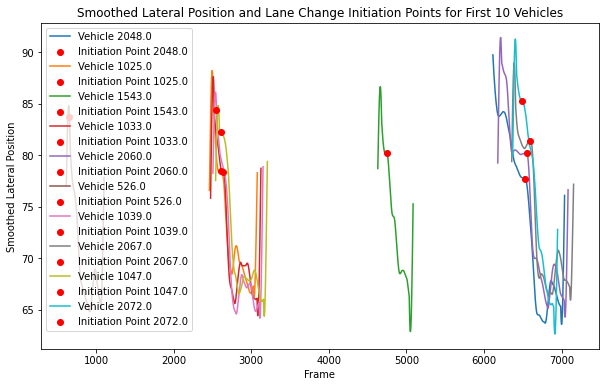

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import os
import re  # Import regex module to extract lane change numbers from file names

# List of file names (without extensions)
file_names = [
    'follower_decision_sorted_merged_lane_changing_2_to_3_bottom_up',
    'follower_decision_sorted_merged_lane_changing_3_to_2_bottom_up',
    'follower_decision_sorted_merged_lane_changing_3_to_4_bottom_up',
    'follower_decision_sorted_merged_lane_changing_4_to_3_bottom_up',
    'follower_decision_sorted_merged_lane_changing_4_to_5_bottom_up',
    'follower_decision_sorted_merged_lane_changing_5_to_4_bottom_up',
    'follower_decision_sorted_merged_lane_changing_5_to_6_bottom_up',
    'follower_decision_sorted_merged_lane_changing_6_to_5_bottom_up',
    'follower_decision_sorted_merged_lane_changing_6_to_7_bottom_up',
    'follower_decision_sorted_merged_lane_changing_7_to_6_bottom_up'
]

# Input and output paths
input_base_path = r'C:\Users\dell\OneDrive - iitr.ac.in\NGSIM data\Data_set_2'
output_file_path = r'C:\Users\dell\OneDrive - iitr.ac.in\NGSIM data\Data_set_2\combined_lane_change_initiation_points.csv'

# Initialize an empty DataFrame to store all initiation points
all_initiation_points = pd.DataFrame()

# Function to parse lane change numbers from the file name
def parse_lanes(file_name):
    match = re.search(r'(\d)_to_(\d)', file_name)
    if match:
        return int(match.group(1)), int(match.group(2))  # Return the source and target lane numbers
    return None, None

# Function to find lane change initiation point based on smoothed lateral position changes
def find_lane_change_initiation(vehicle_df, source_lane, target_lane):
    for idx in range(1, len(vehicle_df)):
        if vehicle_df['lane_no_lane_change'].iloc[idx - 1] == source_lane and vehicle_df['lane_no_lane_change'].iloc[idx] == target_lane:
            lane_change_idx = idx
            
            # Move backward from lane change point to find the initiation using smoothed lateral position
            initial_index = lane_change_idx
            lateral_position_threshold = 0.01  # Threshold for detecting lane change initiation
            
            for i in reversed(range(lane_change_idx)):
                if abs(vehicle_df['smoothed_lateral_position'].iloc[i] - vehicle_df['smoothed_lateral_position'].iloc[initial_index]) > lateral_position_threshold:
                    initial_index = i
                else:
                    break
            return vehicle_df.iloc[initial_index]
    
    return None

# Loop over each file
for file_name in file_names:
    # Construct the full input file path
    input_file_path = os.path.join(input_base_path, f'{file_name}.csv')
    
    # Load the CSV file
    df = pd.read_csv(input_file_path)

    # Ensure columns '1_lane_change' and '4_lane_change' are numeric
    df['1_lane_change'] = pd.to_numeric(df['1_lane_change'], errors='coerce')
    df['4_lane_change'] = pd.to_numeric(df['4_lane_change'], errors='coerce')

    # Apply Savitzky-Golay filter to smoothen the lateral position data
    df['smoothed_lateral_position'] = savgol_filter(df['4_lane_change'], window_length=100, polyorder=2)

    # Extract the source and target lanes from the file name
    source_lane, target_lane = parse_lanes(file_name)

    # Identify lane change initiation points for each vehicle
    lane_change_initiation_points = []
    unique_vehicle_ids = df['0_lane_change'].unique()

    for vehicle_id in unique_vehicle_ids:
        vehicle_df = df[df['0_lane_change'] == vehicle_id].sort_values(by='1_lane_change')
        initiation_point = find_lane_change_initiation(vehicle_df, source_lane, target_lane)
        if initiation_point is not None:
            lane_change_initiation_points.append(initiation_point)

    # Convert the list of initiation points to a DataFrame
    initiation_df = pd.DataFrame(lane_change_initiation_points)

    # Append the initiation points to the combined DataFrame
    all_initiation_points = pd.concat([all_initiation_points, initiation_df], ignore_index=True)

# Save the combined initiation points to a single CSV file
all_initiation_points.to_csv(output_file_path, index=False)

# Print the path to the saved file
print(f"Combined initiation points saved to: {output_file_path}")

# Optional: Plotting for the first 10 vehicles (from the last processed file)
fig, ax = plt.subplots(figsize=(10, 6))

for vehicle_id in unique_vehicle_ids[:10]:
    vehicle_df = df[df['0_lane_change'] == vehicle_id].sort_values(by='1_lane_change')
    initiation_df_vehicle = initiation_df[initiation_df['0_lane_change'] == vehicle_id]
    
    # Plot smoothed lateral position vs frame for each vehicle
    ax.plot(vehicle_df['1_lane_change'].values, vehicle_df['smoothed_lateral_position'].values, label=f'Vehicle {vehicle_id}')
    
    # Plot the initiation points (ensure they exist for the vehicle)
    if not initiation_df_vehicle.empty:
        ax.scatter(initiation_df_vehicle['1_lane_change'].values, initiation_df_vehicle['4_lane_change'].values, 
                   color='red', label=f'Initiation Point {vehicle_id}', zorder=5)

ax.set_xlabel('Frame')
ax.set_ylabel('Smoothed Lateral Position')
ax.set_title('Smoothed Lateral Position and Lane Change Initiation Points for First 10 Vehicles')
ax.legend()
plt.show()



# SAVE ALL THE MATCHED COLUMNS in front of followers when LC vehicle becomes follower and save its decision as well

In [10]:
import pandas as pd

# Load the CSV file
file_path = r'C:\Users\dell\OneDrive - iitr.ac.in\NGSIM data\Data_set_2\combined_lane_change_initiation_points.csv'
df = pd.read_csv(file_path)

# List of all columns to be copied once a match is found
follower_columns = [f'{i}_follower' for i in range(23)] + ['lane_no_follower', 'speed_m_s', 'follower_decision', 'smoothed_lateral_position']

# Initialize columns for storing the matched follower's information
for col in follower_columns:
    df[f'matched_{col}'] = None

# Loop through each row and check if the value in '0_lane_change' matches any value in '0_follower'
for index, row in df.iterrows():
    lane_change_value = row['0_lane_change']
    
    # Check if the '0_lane_change' value matches with any value in '0_follower'
    match_row = df[df['0_follower'] == lane_change_value]
    
    # If there's a match, copy all follower's column values to the respective row
    if not match_row.empty:
        for col in follower_columns:
            df.at[index, f'matched_{col}'] = match_row.iloc[0][col]

# Drop rows where 'matched_0_follower' is still None (i.e., no match was found)
df = df.dropna(subset=['matched_0_follower'])

# Save the modified DataFrame to a new CSV file
output_file_path = r'C:\Users\dell\OneDrive - iitr.ac.in\NGSIM data\Data_set_2\LC_post_decision_with_all_follower_data.csv'
df.to_csv(output_file_path, index=False)

print(f"Rows with matches and all follower data saved to '{output_file_path}'.")


Rows with matches and all follower data saved to 'C:\Users\dell\OneDrive - iitr.ac.in\NGSIM data\Data_set_2\LC_post_decision_with_all_follower_data.csv'.


## Saving data with all the 46 columns after maching vehicle id of lane changer with follewer 

In [1]:
import pandas as pd

# Load the CSV file
file_path = r'C:\Users\dell\OneDrive - iitr.ac.in\NGSIM data\Data_set_2\combined_lane_change_initiation_points.csv'
df = pd.read_csv(file_path)

# List of all lane_change columns (from 0_lane_change to 22_lane_change)
lane_change_columns = [f'{i}_lane_change' for i in range(23)] + ['lane_no_lane_change', 'from_lane_lane_change']

# List of all follower columns (from 0_follower to 22_follower)
follower_columns = [f'{i}_follower' for i in range(23)] + ['lane_no_follower', 'speed_m_s', 'follower_decision', 'smoothed_lateral_position']

# Combine lane_change and follower columns to get all columns to match and copy
all_columns_to_match = lane_change_columns + follower_columns

# Initialize columns for storing the matched follower's information
for col in all_columns_to_match:
    df[f'matched_{col}'] = None

# Loop through each row and check if the value in '0_lane_change' matches any value in '0_follower'
for index, row in df.iterrows():
    lane_change_value = row['0_lane_change']
    
    # Check if the '0_lane_change' value matches with any value in '0_follower'
    match_row = df[df['0_follower'] == lane_change_value]
    
    # If there's a match, copy all lane_change and follower columns' values to the respective row
    if not match_row.empty:
        for col in all_columns_to_match:
            df.at[index, f'matched_{col}'] = match_row.iloc[0][col]

# Drop rows where 'matched_0_follower' is still None (i.e., no match was found)
df = df.dropna(subset=['matched_0_follower'])

# Save the modified DataFrame to a new CSV file
output_file_path = r'C:\Users\dell\OneDrive - iitr.ac.in\NGSIM data\Data_set_2\LC_post_decision_with_all_follower_data.csv'
df.to_csv(output_file_path, index=False)

print(f"Rows with matches and all follower data saved to '{output_file_path}'.")


Rows with matches and all follower data saved to 'C:\Users\dell\OneDrive - iitr.ac.in\NGSIM data\Data_set_2\LC_post_decision_with_all_follower_data.csv'.
